In [1]:
import pandas as pd
board_games = pd.read_csv('board_games.csv')
board_games.head()

,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
0,12333,boardgame,Twilight Struggle,2005.0,2.0,2.0,180.0,180.0,180.0,13.0,20113,8.33774,8.22186,26647,372,1219,5865,5347,2562,3.4785
1,120677,boardgame,Terra Mystica,2012.0,2.0,5.0,150.0,60.0,150.0,12.0,14383,8.28798,8.14232,16519,132,1586,6277,2526,1423,3.8939
2,102794,boardgame,Caverna: The Cave Farmers,2013.0,1.0,7.0,210.0,30.0,210.0,12.0,9262,8.28994,8.06886,12230,99,1476,5600,1700,777,3.7761
3,25613,boardgame,Through the Ages: A Story of Civilization,2006.0,2.0,4.0,240.0,240.0,240.0,12.0,13294,8.20407,8.05804,14343,362,1084,5075,3378,1642,4.1590
4,3076,boardgame,Puerto Rico,2002.0,2.0,5.0,150.0,90.0,150.0,12.0,39883,8.14261,8.04524,44362,795,861,5414,9173,5213,3.2943


In [2]:
board_games = board_games.dropna()

In [3]:
board_games.shape[0]

81268

(array([ 24374.,    606.,   1324.,   3303.,   6681.,  12264.,  15835.,
         11733.,   3860.,   1288.]),
 array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.]),
 <a list of 10 Patch objects>)

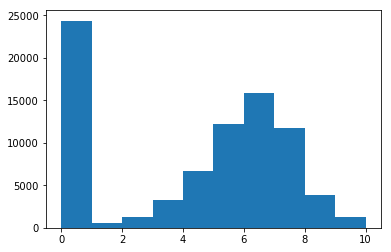

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(board_games["average_rating"])

Generally it is a guassian distribution. But there are many values with zero rating. Need to explore the zero ratings.

(array([   602.,   1231.,   2824.,   5206.,   8223.,  13593.,  13849.,
          8470.,   2224.,    672.]),
 array([  1. ,   1.9,   2.8,   3.7,   4.6,   5.5,   6.4,   7.3,   8.2,
          9.1,  10. ]),
 <a list of 10 Patch objects>)

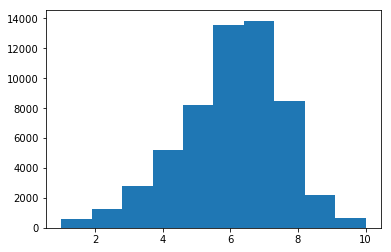

In [5]:
board_games = board_games[board_games["users_rated"] > 0]
plt.hist(board_games["average_rating"])

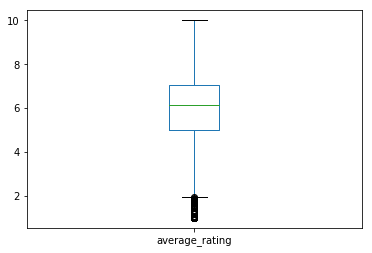

In [6]:
board_games['average_rating'].plot(kind='box')

In [7]:
board_games['average_rating'].describe()

count    56894.000000
mean         6.016113
std          1.578830
min          1.000000
25%          5.000000
50%          6.150000
75%          7.040000
max         10.000000
Name: average_rating, dtype: float64

### ERROR METRICS
A good error metrics would be RMSE. Reason being it would penalize errors far away but would not penalize the smaller errors so much.

In [8]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)

In [9]:
numeric_columns = board_games.iloc[:,3:]
numeric_columns.head()

,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
0,2005.0,2.0,2.0,180.0,180.0,180.0,13.0,20113,8.33774,8.22186,26647,372,1219,5865,5347,2562,3.4785
1,2012.0,2.0,5.0,150.0,60.0,150.0,12.0,14383,8.28798,8.14232,16519,132,1586,6277,2526,1423,3.8939
2,2013.0,1.0,7.0,210.0,30.0,210.0,12.0,9262,8.28994,8.06886,12230,99,1476,5600,1700,777,3.7761
3,2006.0,2.0,4.0,240.0,240.0,240.0,12.0,13294,8.20407,8.05804,14343,362,1084,5075,3378,1642,4.1590
4,2002.0,2.0,5.0,150.0,90.0,150.0,12.0,39883,8.14261,8.04524,44362,795,861,5414,9173,5213,3.2943


In [10]:
labels = kmeans.fit_predict(numeric_columns)

In [11]:
def find_mean(row):
    return row.mean()
game_mean = numeric_columns.apply(find_mean, axis=1)
game_mean.head()

0    3806.296359
1    2662.195541
2    1979.243229
3    2467.201242
4    6360.675421
dtype: float64

In [12]:
def find_std(row):
    return row.std()
game_std = numeric_columns.apply(find_std, axis=1)

In [13]:
game_std.head()

0     7679.500263
1     5084.906737
2     3622.373162
3     4502.343932
4    13731.617101
dtype: float64

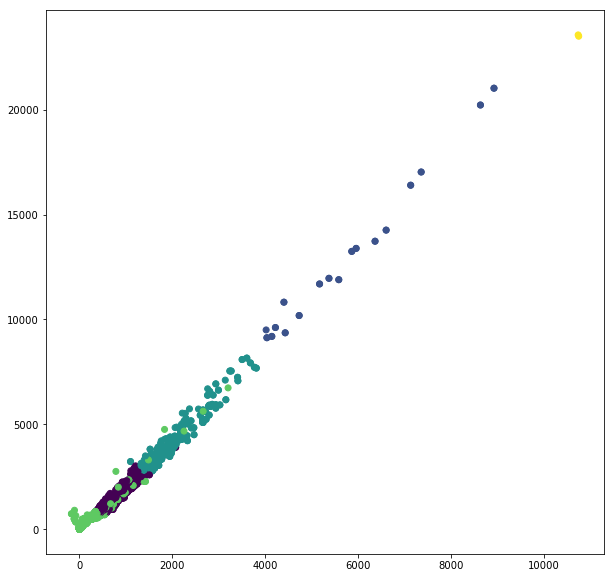

In [14]:
plt.figure(figsize=(10,10))
plt.scatter(x=game_mean, y=game_std, c=labels)

A lot of games are same.
Mean is also the same for lot of games. And there are other games being played more. Lets remove year columns and try again.

In [15]:
numeric_columns_wo_year = board_games.iloc[:,4:]
numeric_columns_wo_year.head()

,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
0,2.0,2.0,180.0,180.0,180.0,13.0,20113,8.33774,8.22186,26647,372,1219,5865,5347,2562,3.4785
1,2.0,5.0,150.0,60.0,150.0,12.0,14383,8.28798,8.14232,16519,132,1586,6277,2526,1423,3.8939
2,1.0,7.0,210.0,30.0,210.0,12.0,9262,8.28994,8.06886,12230,99,1476,5600,1700,777,3.7761
3,2.0,4.0,240.0,240.0,240.0,12.0,13294,8.20407,8.05804,14343,362,1084,5075,3378,1642,4.1590
4,2.0,5.0,150.0,90.0,150.0,12.0,39883,8.14261,8.04524,44362,795,861,5414,9173,5213,3.2943


In [16]:
labels = kmeans.fit_predict(numeric_columns_wo_year)

In [17]:
game_mean = numeric_columns_wo_year.apply(find_mean, axis=1)
game_mean.head()

0    3918.877381
1    2702.832763
2    1977.133431
3    2496.026319
4    6633.092634
dtype: float64

In [18]:
game_std = numeric_columns_wo_year.apply(find_std, axis=1)
game_std.head()

0     7916.851766
1     5248.817315
2     3741.160127
3     4648.380459
4    14134.429599
dtype: float64

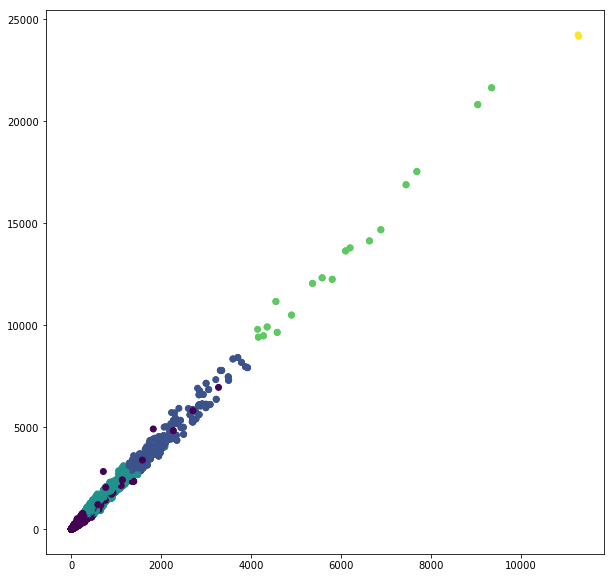

In [19]:
plt.figure(figsize=(10,10))
plt.scatter(x=game_mean, y=game_std, c=labels)

Looks quite similar to the previous graph. So year published had rather less influence.

In [20]:
correlations = numeric_columns.corr()

In [21]:
correlations['average_rating'].sort_values()

minplayers             -0.032701
maxplayers             -0.008335
minplaytime             0.043985
playingtime             0.048994
maxplaytime             0.048994
yearpublished           0.108461
total_weights           0.109691
users_rated             0.112564
total_traders           0.119452
total_comments          0.123714
total_owners            0.137478
total_wishers           0.171375
total_wanters           0.196566
minage                  0.210049
bayes_average_rating    0.231563
average_weight          0.351081
average_rating          1.000000
Name: average_rating, dtype: float64

Average weight is an interesting correlation.
Suprisingly total_wanters have a positve correlation.
Min age +ve is an other suprise. And maybe younger ppl do not rate much.
yearpublished is also a suprising +ve correlation.

In [22]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [23]:
columns_interesting = ['average_weight','bayes_average_rating', 'minage', 'total_wanters','total_wishers','total_owners','total_comments','total_traders','users_rated','total_weights','yearpublished','maxplayers','minplayers']


In [24]:
reg.fit(board_games[columns_interesting], board_games['average_rating'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [25]:
predictions = reg.predict(board_games[columns_interesting])

In [26]:
predictions

array([ 10.65626956,  10.26570727,  10.76748688, ...,   6.12729612,
         5.53786846,   6.07601074])

(array([  1.00000000e+00,   3.00000000e+00,   1.88100000e+03,
          3.15110000e+04,   1.91890000e+04,   3.77300000e+03,
          4.27000000e+02,   8.50000000e+01,   1.50000000e+01,
          9.00000000e+00]),
 array([  2.4958291 ,   3.38854571,   4.28126232,   5.17397892,
          6.06669553,   6.95941214,   7.85212874,   8.74484535,
          9.63756196,  10.53027856,  11.42299517]),
 <a list of 10 Patch objects>)

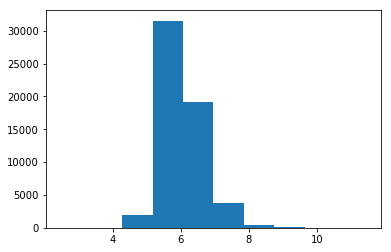

In [27]:
plt.hist(predictions)

In [28]:
board_games['prediction'] = predictions

In [29]:
sum_sq_error = ((board_games['average_rating'] - board_games['prediction'])**2).sum()
sum_sq_error

119132.44017084698

In [30]:
rmse = (sum_sq_error / len(board_games)) ** (1/2)
rmse

1.4470441588783658

Our rmse is around 1.4 

In [31]:
mse = (sum_sq_error / len(board_games))
mse

2.0939367977439973

Training and test split

In [39]:
board_games = pd.read_csv('board_games.csv')
board_games = board_games.dropna()
board_games = board_games[board_games["users_rated"] > 0]

len(board_games) * 0.75

42670.5

In [40]:
train = board_games[0:42670]
test = board_games[42670:]

In [41]:
train.shape[0]

42670

In [42]:
test.shape[0]

14224

In [62]:
reg.fit(train[columns_interesting], train['average_rating'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [63]:
test['predictions'] = reg.predict(test[columns_interesting])
test[['average_rating','predictions']].head()

/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,average_rating,predictions
55920,4.83333,5.186180
55921,5.50000,5.142522
55923,5.00000,4.840655
55924,7.52205,6.615130
55925,4.50000,5.105220


In [64]:
def rmse():
    sum_sq_error = ((test['average_rating'] - test['predictions'])**2).sum()
    rmse = (sum_sq_error / len(test)) ** (1/2)
    return rmse
rmse()

1.9684557718397397

In [76]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1)

In [77]:
ridge.fit(train[columns_interesting], train['average_rating'])

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [78]:
test['predictions'] = ridge.predict(test[columns_interesting])

/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [79]:
rmse()

1.9684543986022405

Adding more columns

In [80]:
board_games['player_range'] = board_games['maxplayers'] - board_games['minplayers']
board_games['player_time_range'] = board_games['maxplaytime'] - board_games['minplaytime']
board_games['average_number_rating'] = board_games['total_owners'] / board_games['users_rated']
board_games.head()

,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,...,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight,player_range,player_time_range,average_number_rating
0,12333,boardgame,Twilight Struggle,2005.0,2.0,2.0,180.0,180.0,180.0,13.0,...,26647,372,1219,5865,5347,2562,3.4785,0.0,0.0,1.324865
1,120677,boardgame,Terra Mystica,2012.0,2.0,5.0,150.0,60.0,150.0,12.0,...,16519,132,1586,6277,2526,1423,3.8939,3.0,90.0,1.148509
2,102794,boardgame,Caverna: The Cave Farmers,2013.0,1.0,7.0,210.0,30.0,210.0,12.0,...,12230,99,1476,5600,1700,777,3.7761,6.0,180.0,1.320449
3,25613,boardgame,Through the Ages: A Story of Civilization,2006.0,2.0,4.0,240.0,240.0,240.0,12.0,...,14343,362,1084,5075,3378,1642,4.1590,2.0,0.0,1.078908
4,3076,boardgame,Puerto Rico,2002.0,2.0,5.0,150.0,90.0,150.0,12.0,...,44362,795,861,5414,9173,5213,3.2943,3.0,60.0,1.112303


In [81]:
columns_interesting.append('player_range')
columns_interesting.append('player_time_range')
columns_interesting.append('average_number_rating')
columns_interesting

['average_weight',
 'bayes_average_rating',
 'minage',
 'total_wanters',
 'total_wishers',
 'total_owners',
 'total_comments',
 'total_traders',
 'users_rated',
 'total_weights',
 'yearpublished',
 'maxplayers',
 'minplayers',
 'player_range',
 'player_time_range',
 'average_number_rating']

In [82]:
train = board_games[0:42670]
test = board_games[42670:]

In [83]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.4)
ridge.fit(train[columns_interesting], train['average_rating'])

Ridge(alpha=0.4, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [84]:
test['predictions'] = ridge.predict(test[columns_interesting])

/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [85]:
rmse()

1.9022265475620825